In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

In [ ]:
from keras.models import Model

In [ ]:
from keras.layers import Input, Dense

# Load MNIST data set & unpack into train & test

In [ ]:
(X_Train,_), (X_Test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_Train.shape

(60000, 28, 28)

In [ ]:
X_Test.shape

(10000, 28, 28)

# Scale the data

In [ ]:
X_Train = X_Train/255

In [ ]:
X_Test = X_Test/255

In [ ]:
X_Train = X_Train.reshape(60000, 784)

In [ ]:
X_Test = X_Test.reshape(10000, 784)

In [ ]:
X_Train.shape, X_Test.shape

((60000, 784), (10000, 784))

In [ ]:
input_image = Input(shape = (784,))

In [ ]:
input_image

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'input_1')>

In [ ]:
encoded = Dense(units=128, activation='relu')(input_image)

In [ ]:
encoded = Dense(64, activation='relu')(encoded)

In [ ]:
encoded = Dense(32, activation='relu')(encoded)

In [ ]:
decoded = Dense(64, activation='relu')(encoded)

In [ ]:
decoded = Dense(128, activation='relu')(decoded)

In [ ]:
output = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoecoder = Model(input_image, output)

In [ ]:
encoderModel = Model(input_image, encoded)

In [ ]:
autoecoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [ ]:
encoderModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoecoder.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

In [ ]:
#from livelossplot import PlotLossesKeras

In [ ]:
autoecoder.fit(X_Train,
               X_Train,
               epochs=100,
               batch_size = 128,
               validation_data=(X_Test, X_Test),
               shuffle=True)
               #callbacks = PlotLossesKeras())

Epoch 1/100
469/469 [==============================] - 5s 4ms/step - loss: 0.0504 - mae: 0.1123 - val_loss: 0.0277 - val_mae: 0.0700
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0243 - mae: 0.0637 - val_loss: 0.0213 - val_mae: 0.0578
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0200 - mae: 0.0548 - val_loss: 0.0180 - val_mae: 0.0504
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0175 - mae: 0.0495 - val_loss: 0.0163 - val_mae: 0.0469
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0161 - mae: 0.0465 - val_loss: 0.0154 - val_mae: 0.0447
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0151 - mae: 0.0444 - val_loss: 0.0143 - val_mae: 0.0426
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0142 - mae: 0.0424 - val_loss: 0.0135 - val_mae: 0.0411
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - 

In [ ]:
encoded_test_imgs = encoderModel.predict(X_Test)
recreated_test_imgs = autoecoder.predict(X_Test)

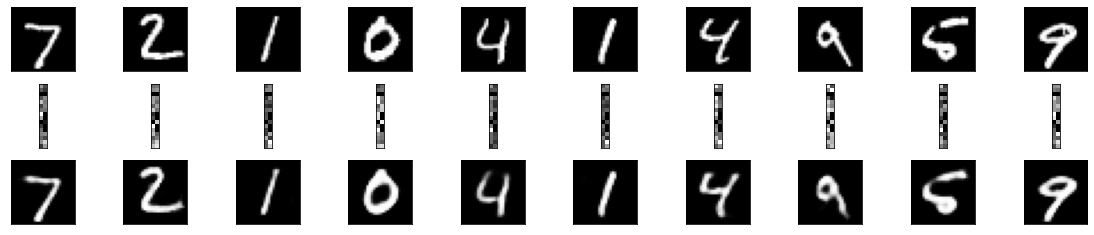

In [ ]:
plt.figure(figsize=(40,4))
for i in range(10):
    #original images
    ax=plt.subplot(3,20,i+1)
    plt.imshow(X_Test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Compressed Representation
    ax=plt.subplot(3,20,i+1+20)
    plt.imshow(encoded_test_imgs[i].reshape(16,2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Recreated Images
    ax=plt.subplot(3,20,i+1+20+20)
    plt.imshow(recreated_test_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)